In [196]:
import numpy as np 
import pandas as pd 
from fbprophet import Prophet

%matplotlib inline

### conda install -c conda-forge fbprophet

In [197]:
df = pd.read_csv("avocado.historical.price.data.csv")
df_2018 = pd.read_csv("Avocado_2018.csv")
df_SPY = pd.read_csv("SPY.historical.prices.csv")
df_SPY_Actual = pd.read_csv("SPY_ACTUAL.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [198]:
df_SPY.head()

,Date,Close
0,1/1/15,202.309998
1,1/8/15,200.860001
2,1/15/15,203.080002
3,1/22/15,200.139999
4,1/29/15,204.059998


In [199]:
df.groupby('type').groups

{'conventional': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125],
            dtype='int64', length=9126),
 'organic': Int64Index([ 9126,  9127,  9128,  9129,  9130,  9131,  9132,  9133,  9134,
              9135,
             ...
             18239, 18240, 18241, 18242, 18243, 18244, 18245, 18246, 18247,
             18248],
            dtype='int64', length=9123)}

In [200]:
# We got two types of avocados - conventional and organic

PREDICTION_TYPE = 'conventional'
df = df[df.type == PREDICTION_TYPE]

In [201]:
# Converting Date column of our DataFrame to pandas readable type.

df['Date'] = pd.to_datetime(df['Date'])
#df_2018['Date'] = pd.to_datetime(df_2018['Date'])

In [202]:
# Each one of the regions has exactly 169 entries. 

regions = df.groupby(df.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Total regions : 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLouis  :  169
Syracuse  

In [203]:
PREDICTING_FOR = "TotalUS"

In [204]:
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

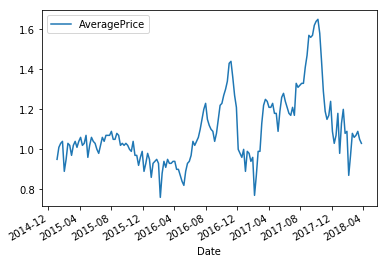

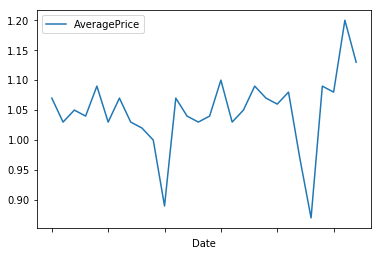

In [205]:
date_price.plot(x='Date', y='AveragePrice', kind="line")
df_2018.plot(x='Date', y='AveragePrice', kind="line")

In [206]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [207]:
#Creating & fitting a model.

m = Prophet()
m.fit(date_price)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [208]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [209]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
529,2019-03-21,1.163002,1.094957,1.230084,0.976246,1.231191,-0.061007,-0.061007,-0.061007,0.0,0.0,0.0,-0.061007,-0.061007,-0.061007,1.101996
530,2019-03-22,1.162874,1.094468,1.230303,0.974173,1.237803,-0.059586,-0.059586,-0.059586,0.0,0.0,0.0,-0.059586,-0.059586,-0.059586,1.103288
531,2019-03-23,1.162745,1.093944,1.230513,0.978422,1.240537,-0.057689,-0.057689,-0.057689,0.0,0.0,0.0,-0.057689,-0.057689,-0.057689,1.105056
532,2019-03-24,1.162616,1.093420,1.230721,0.973998,1.248810,-0.055330,-0.055330,-0.055330,0.0,0.0,0.0,-0.055330,-0.055330,-0.055330,1.107286
533,2019-03-25,1.162488,1.092896,1.230928,0.988924,1.238827,-0.052542,-0.052542,-0.052542,0.0,0.0,0.0,-0.052542,-0.052542,-0.052542,1.109946


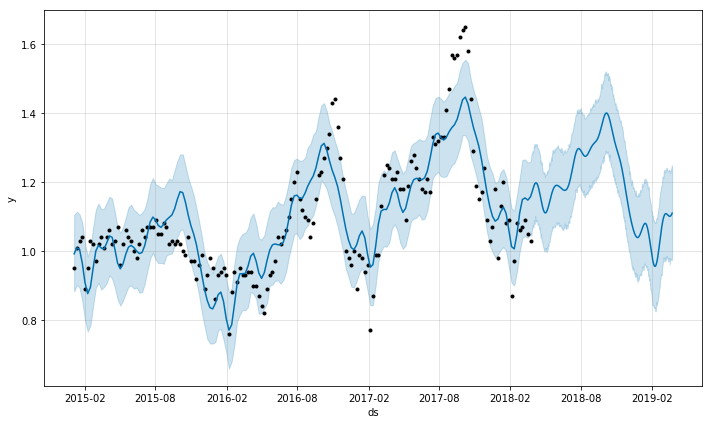

In [210]:
fig1 = m.plot(forecast)

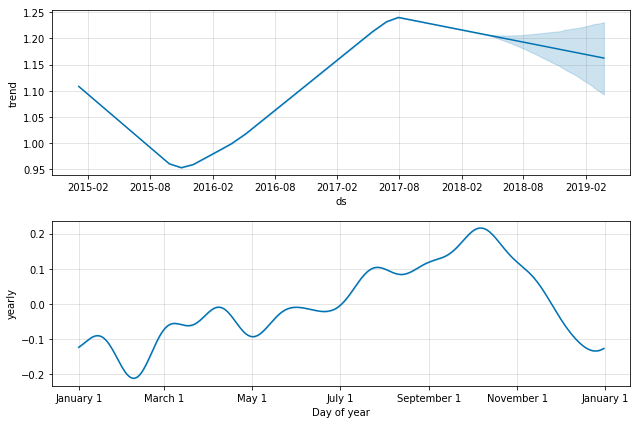

In [211]:
fig2 = m.plot_components(forecast)

In [212]:
# Now we will predict the future price of the S&P Index
df_SPY['Date'] = pd.to_datetime(df_SPY['Date'])
df_SPY_Actual['Date'] = pd.to_datetime(df_SPY_Actual['Date'])

In [213]:
date_price_SPY = df_SPY[['Date', 'Close']].reset_index(drop=True)
date_price_SPY_Actual = df_SPY_Actual[['Date', 'Close']].reset_index(drop=True)

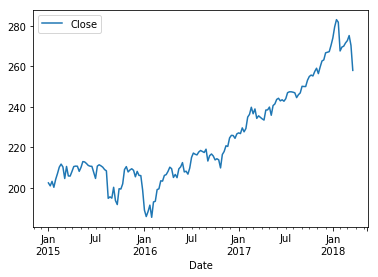

In [214]:
date_price_SPY.plot(x='Date', y='Close', kind="line")

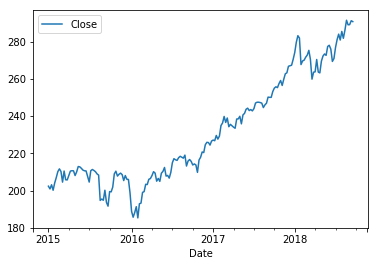

In [215]:
date_price_SPY_Actual.plot(x='Date', y='Close', kind="line")

In [106]:
date_price_SPY = date_price_SPY.rename(columns={'Date':'ds', 'Close':'y'})

In [107]:
#Creating & fitting a model.

m = Prophet()
m.fit(date_price_SPY)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [108]:
future_2 = m.make_future_dataframe(periods=365)
forecast_2 = m.predict(future_2)
forecast_2.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
529,2019-03-18,322.190082,315.128730,329.536359,311.050261,329.725253,-2.040850,-2.040850,-2.040850,0.0,0.0,0.0,-2.040850,-2.040850,-2.040850,320.149232
530,2019-03-19,322.315167,315.219285,329.701644,311.202848,329.654890,-2.189332,-2.189332,-2.189332,0.0,0.0,0.0,-2.189332,-2.189332,-2.189332,320.125835
531,2019-03-20,322.440253,315.309840,329.837751,310.995524,329.509970,-2.297155,-2.297155,-2.297155,0.0,0.0,0.0,-2.297155,-2.297155,-2.297155,320.143097
532,2019-03-21,322.565338,315.400305,329.973105,311.540508,329.518354,-2.361649,-2.361649,-2.361649,0.0,0.0,0.0,-2.361649,-2.361649,-2.361649,320.203689
533,2019-03-22,322.690423,315.490811,330.134029,311.186604,329.630675,-2.381017,-2.381017,-2.381017,0.0,0.0,0.0,-2.381017,-2.381017,-2.381017,320.309406


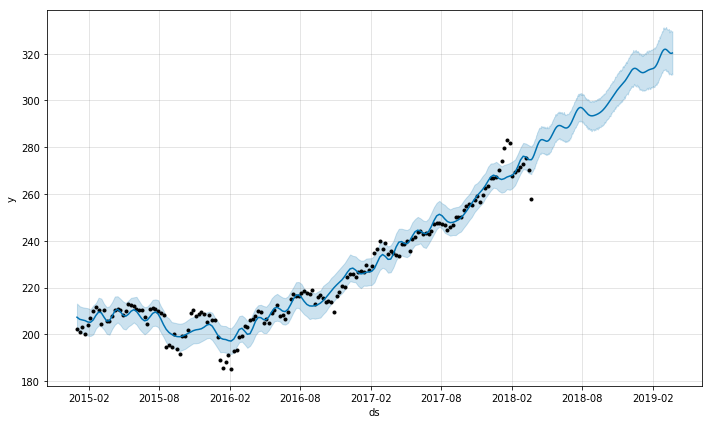

In [109]:
fig_SPY = m.plot(forecast_2)

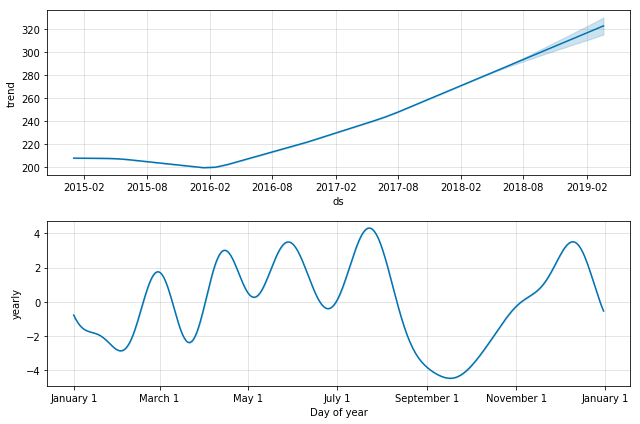

In [101]:
fig_SPY_2 = m.plot_components(forecast_2)

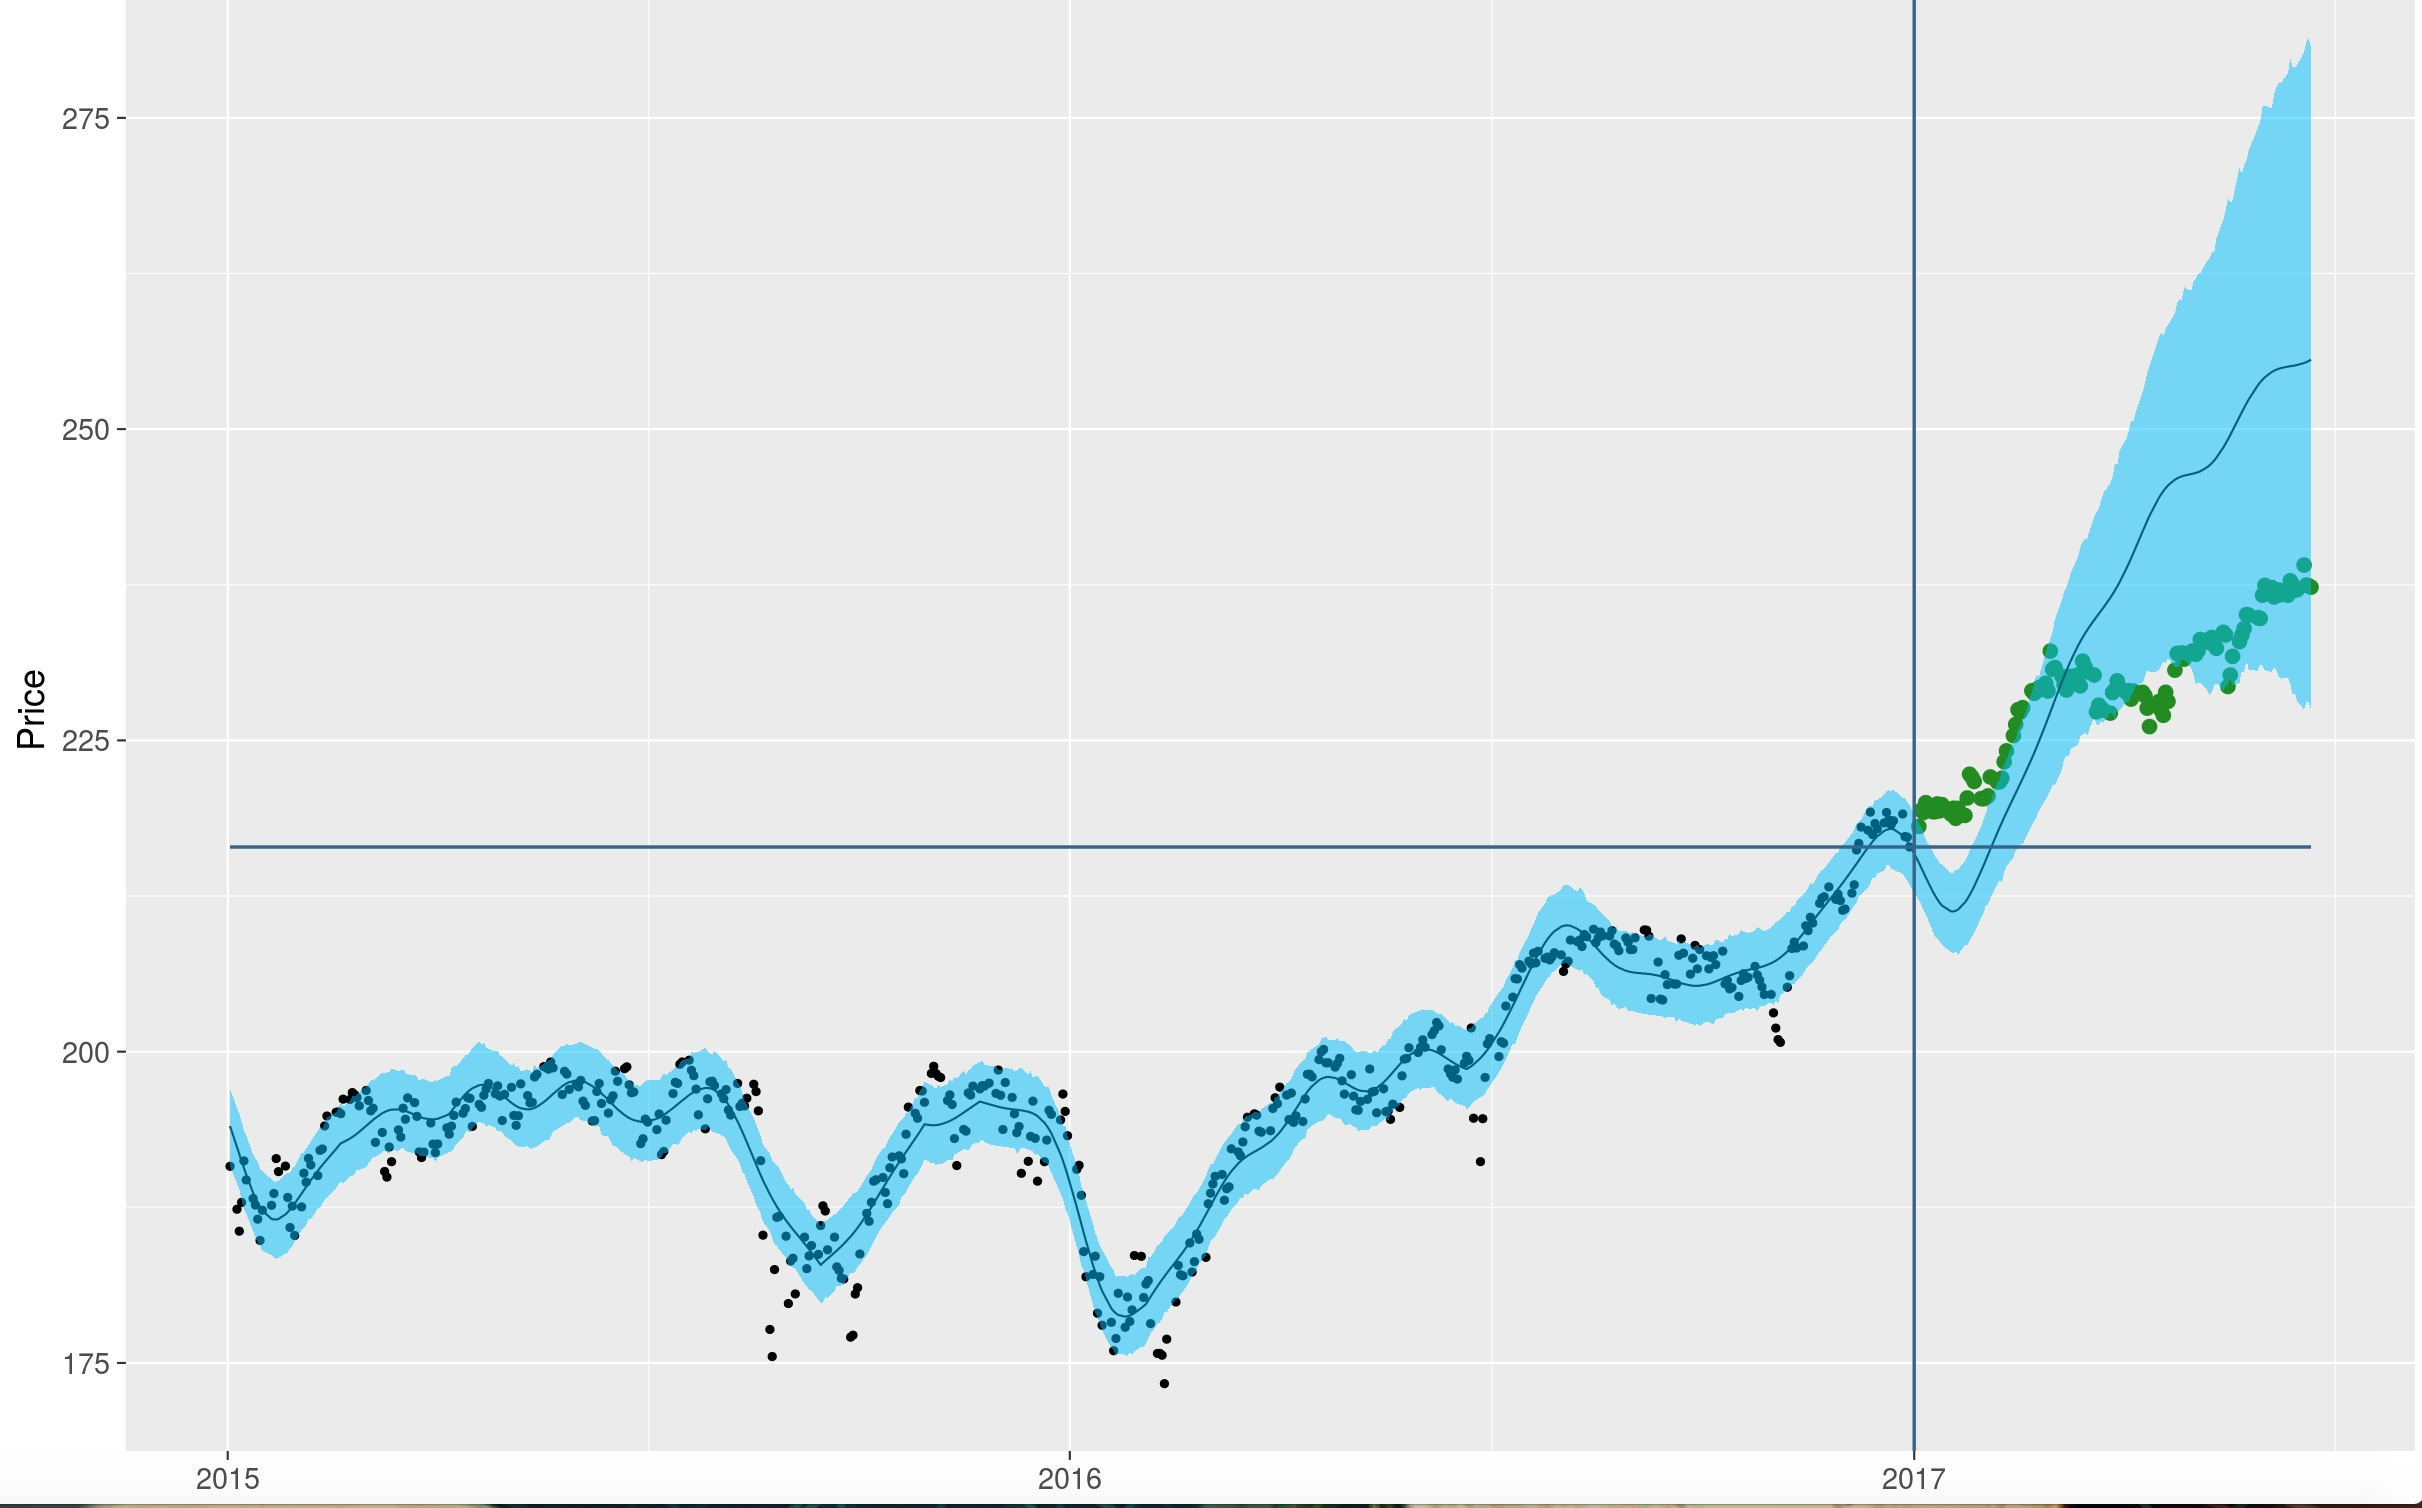

In [115]:
from IPython.display import Image
Image(filename='Comparison.jpeg') 